In [1]:
from datasets import load_dataset
from itertools import islice

split_sizes = {
    "train": 10000,
    "valid": 1000
}

for split in split_sizes:
    dataset = load_dataset(f"transformersbook/codeparrot-{split}", split="validation" if split=="valid" else split, streaming=True)
    split_rows = list(islice(dataset, split_sizes[split]))

    with open(f"{split}.txt", "w") as f:
        for row in split_rows:
            f.write(row["content"]+"\n")

/Users/sathyakrishnansuresh/Desktop/final-yr-project/backend/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.
Repo card metadata block was not found. Setting CardData to empty.


## Remove comments

In [2]:
files = ["train.txt", "valid.txt"]

for file_name in files:
    new_lines = []
    with open(file_name, "r") as f:
        for line in f:
            if not line.startswith("#") and len(line.strip())>0:
                new_lines.append(line)
    
    with open(file_name, "w") as f:
        for line in new_lines:
            f.write(line + "\n")

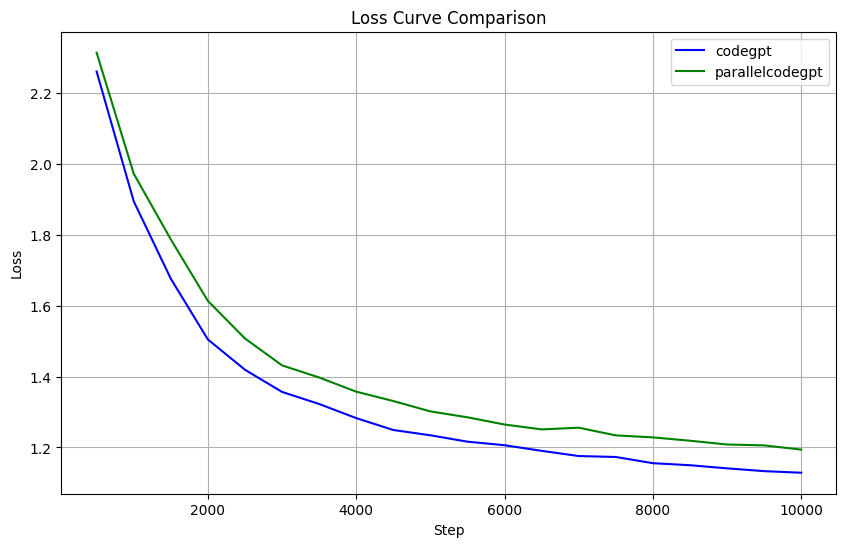

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

c = pd.read_csv("codegpt.csv")
p = pd.read_csv("parallelcodegpt.csv")

c.rename({"Value": "codegpt"}, axis=1, inplace=True)
c["parallelcodegpt"] = p["Value"]

plt.figure(figsize=(10, 6))
plt.plot(c['Step'], c['codegpt'], label='codegpt', color='blue')  # Blue color for Run 1
plt.plot(c['Step'], c['parallelcodegpt'], label='parallelcodegpt', color='green')  # Green color for Run 2

plt.title('Loss Curve Comparison')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.savefig("loss_comparison.png")
plt.show()